In [1]:
import pandas as pd

def get_model_folds(model_num):
    folds = {}
    for fold in range(5):
        test_file = f'../data/cv_folds/{model_num}/test_{fold}.txt'
        with open(test_file, 'r') as f:
            folds[fold] = [line.strip() for line in f.readlines()]
    df = pd.DataFrame([(key + 1, value) for key, values in folds.items() for value in values], columns=['Fold', 'Sample'])
    df.index = df['Sample']
    return df
print(get_model_folds(1))
    

            Fold      Sample
Sample                      
MD-02_Base     1  MD-02_Base
MD-02_End      1   MD-02_End
MD-03_Base     1  MD-03_Base
MD-03_End      1   MD-03_End
MD-04_Base     1  MD-04_Base
...          ...         ...
MD-73_End      5   MD-73_End
MD-74_Base     5  MD-74_Base
MD-74_End      5   MD-74_End
MD-75_Base     5  MD-75_Base
MD-76_Base     5  MD-76_Base

[89 rows x 2 columns]


In [2]:

embedding = pd.read_csv('../data/emb/missingness/emb_p_1.0_q_1.0_g_0.tsv',sep='\t',index_col=0)
embedding

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
MD-02_Base,-0.095766,0.096026,0.082035,-0.040322,-0.220956,0.057702,-0.302310,0.301603,-0.316258,-0.077594,...,0.027806,-0.075859,0.042956,-0.089243,-0.350027,-0.347612,-0.039093,-0.013569,-0.058403,-0.218352
COG0401,0.022475,-0.025688,-0.031978,0.026215,-0.247149,0.054986,-0.116397,-0.006223,-0.097697,0.065463,...,-0.093323,0.051116,0.130248,-0.021128,0.052656,-0.199542,-0.062279,0.039159,-0.045963,0.034227
MD-02_End,0.181412,-0.011361,-0.014373,-0.042591,-0.205448,-0.086409,-0.086200,0.041092,-0.124487,-0.115974,...,-0.246095,-0.039088,0.166432,-0.134755,-0.191473,-0.218145,-0.108266,-0.031046,0.111957,-0.132931
MD-03_End,0.100962,-0.164314,-0.052206,-0.081669,-0.187836,0.166730,-0.159986,-0.032726,-0.262626,0.073198,...,-0.039542,0.053829,0.044793,-0.087621,-0.138876,-0.422218,0.035811,-0.049459,-0.274079,0.024104
MD-04_Base,-0.061469,-0.289597,0.159288,0.098828,-0.033134,-0.170625,-0.175073,0.045156,-0.205084,-0.183712,...,-0.058011,0.049854,0.105829,-0.115249,0.026893,-0.357367,0.278844,-0.066716,-0.136877,-0.279109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P_AQ.995,0.019864,-0.041831,0.002095,-0.137775,-0.170267,0.042215,-0.115015,0.007943,0.008442,-0.017400,...,-0.143494,0.082656,0.030809,-0.023236,0.083623,-0.192579,0.018182,0.072946,0.039652,0.039700
P_AQ.996,0.057292,-0.013738,-0.053525,-0.031837,-0.221249,0.111665,-0.121845,-0.033025,-0.079713,0.059607,...,-0.114463,0.070364,0.106042,-0.063862,0.035217,-0.266999,-0.029872,0.044328,0.054152,-0.030457
P_AQ.997,0.058567,0.023465,0.027639,-0.041236,-0.235823,0.057936,-0.089644,-0.011633,-0.086799,-0.008628,...,-0.160199,0.026458,0.119660,-0.077734,0.056513,-0.283882,0.033096,0.008975,0.027450,-0.008086
P_AQ.998,0.036541,-0.000106,0.012254,0.045774,-0.309176,0.055422,-0.101166,0.061645,0.014395,0.047715,...,-0.067562,0.031146,0.131636,-0.031774,0.040678,-0.267550,-0.021620,0.029358,0.085144,-0.008030


In [3]:
labels = pd.read_csv('../data/raw/sample_breakdown.csv')
labels

,nodes,run,partition,Time
0,MD-02_Base,1,train,Baseline
1,MD-02_End,1,train,Endpoint
2,MD-03_Base,1,train,Baseline
3,MD-03_End,1,train,Endpoint
4,MD-04_Base,1,train,Baseline
...,...,...,...,...
540,MD-43_Base,5,test,Baseline
541,MD-43_End,5,test,Endpoint
542,MD-55_End,5,test,Endpoint
543,MD-64_Base,5,test,Baseline


In [4]:
def get_model_annotations(model_num, labels):
    labels = labels.loc[labels['run'] == model_num]
    labels.index = labels['nodes']
    cv_folds = get_model_folds(model_num)
    annotations = pd.concat([labels['Time'], cv_folds], axis=1)
    annotations.drop(columns=['Sample'], inplace=True)
    annotations.fillna('Test', inplace=True)
    return annotations

print(get_model_annotations(1, labels))

                Time  Fold
MD-02_Base  Baseline   1.0
MD-02_End   Endpoint   1.0
MD-03_Base  Baseline   1.0
MD-03_End   Endpoint   1.0
MD-04_Base  Baseline   1.0
...              ...   ...
MD-60_Base  Baseline  Test
MD-60_End   Endpoint  Test
MD-61_Base  Baseline  Test
MD-61_End   Endpoint  Test
MD-62_End   Endpoint  Test

[109 rows x 2 columns]


/tmp/ipykernel_3820253/1394228271.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Test' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.fillna('Test', inplace=True)


/tmp/ipykernel_3820253/1394228271.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Test' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.fillna('Test', inplace=True)
/mnt/home/f0106093/anaconda3/envs/multiomics/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


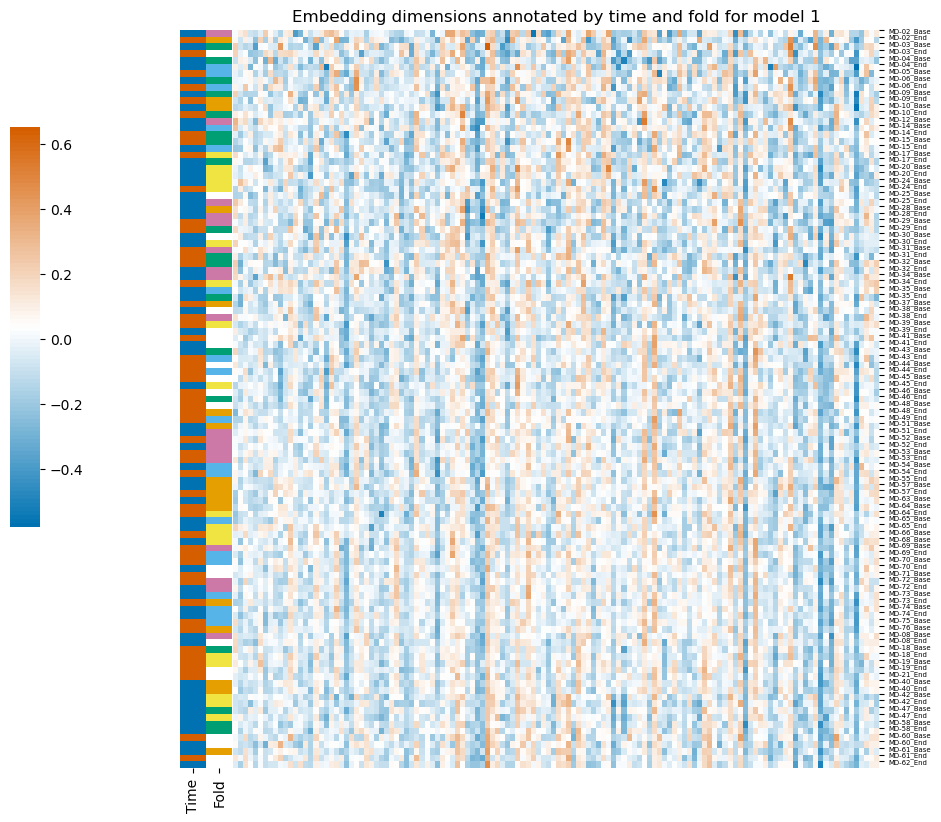

/tmp/ipykernel_3820253/1394228271.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Test' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.fillna('Test', inplace=True)
/mnt/home/f0106093/anaconda3/envs/multiomics/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


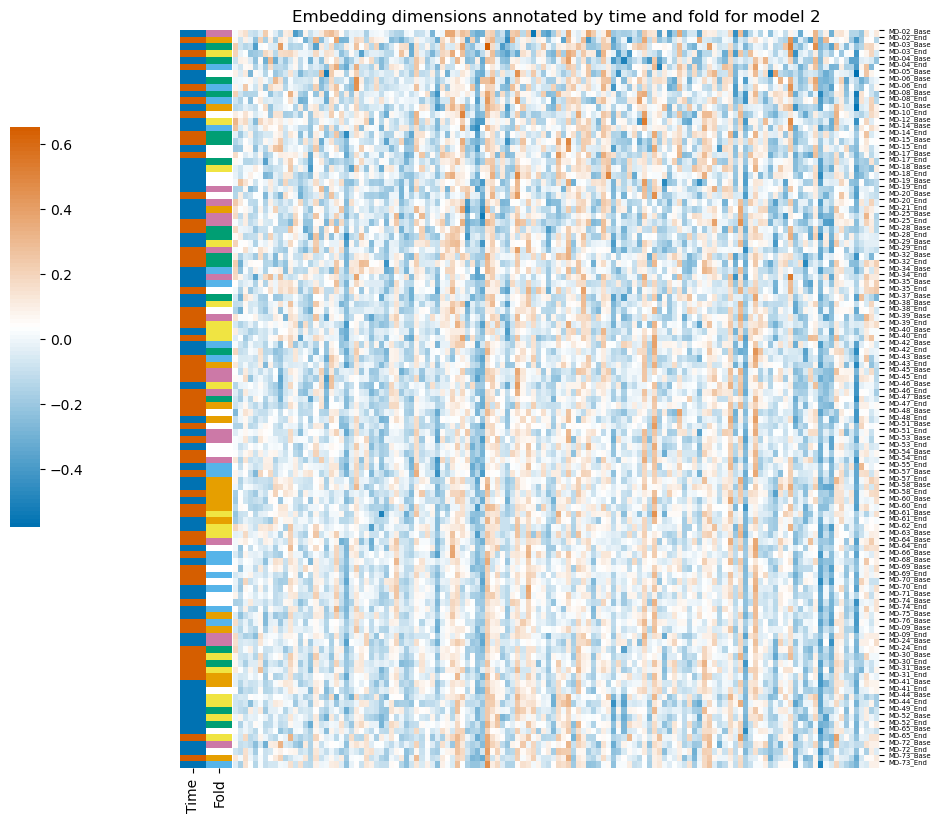

/tmp/ipykernel_3820253/1394228271.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Test' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.fillna('Test', inplace=True)
/mnt/home/f0106093/anaconda3/envs/multiomics/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


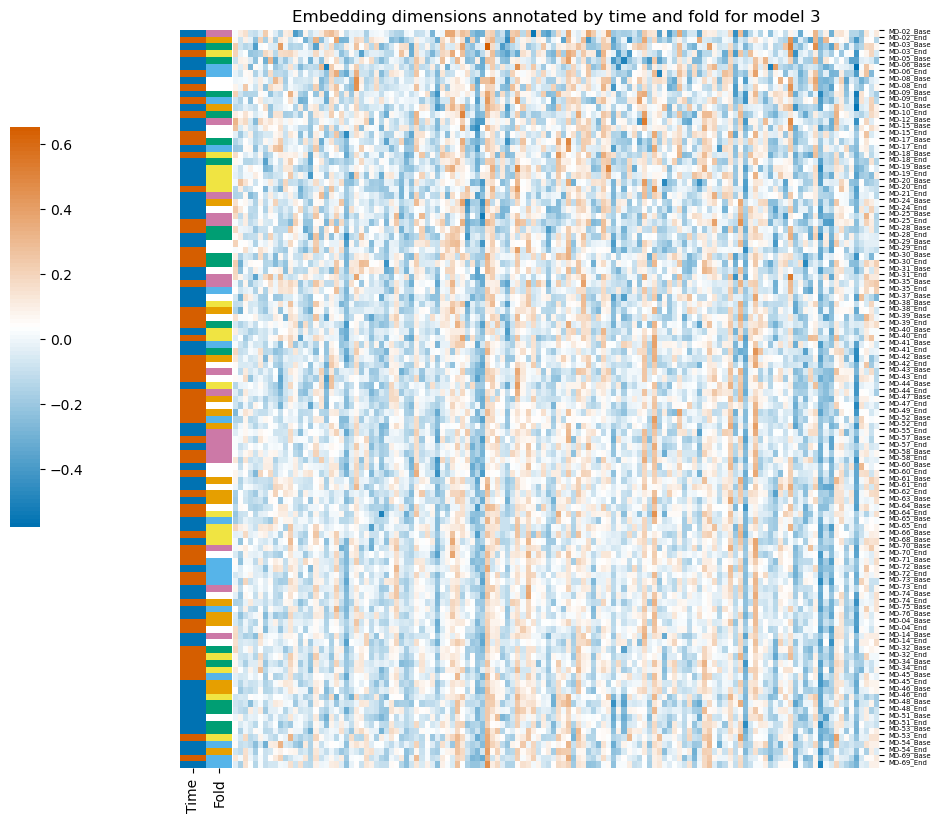

/tmp/ipykernel_3820253/1394228271.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Test' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.fillna('Test', inplace=True)
/mnt/home/f0106093/anaconda3/envs/multiomics/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


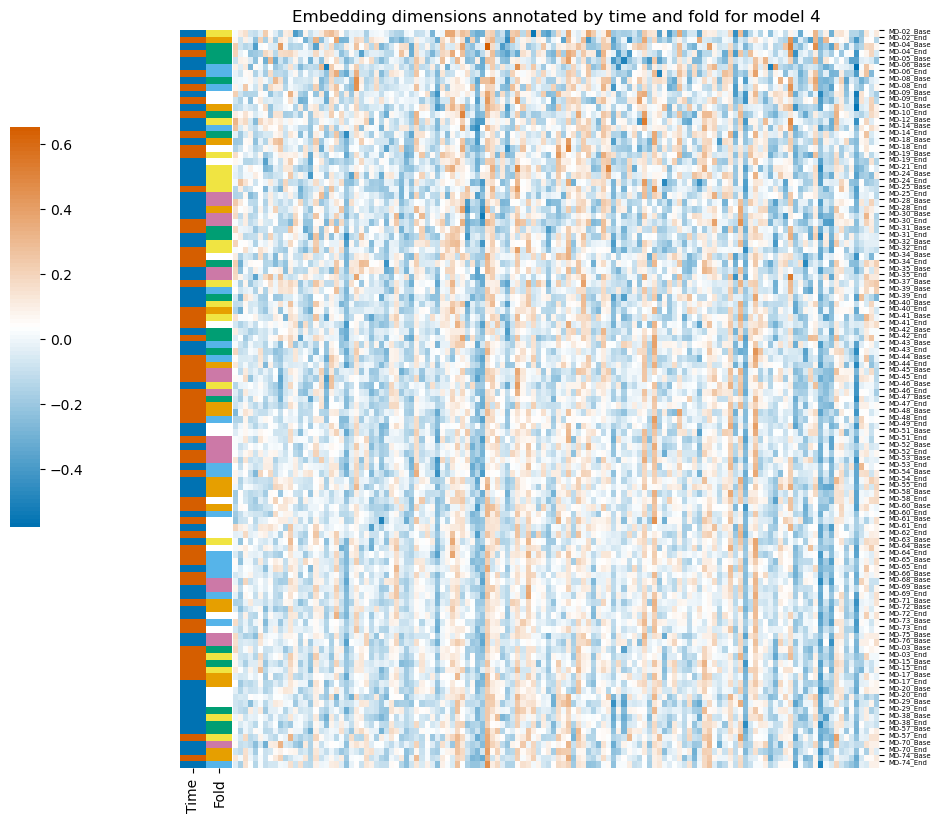

/tmp/ipykernel_3820253/1394228271.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Test' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.fillna('Test', inplace=True)
/mnt/home/f0106093/anaconda3/envs/multiomics/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


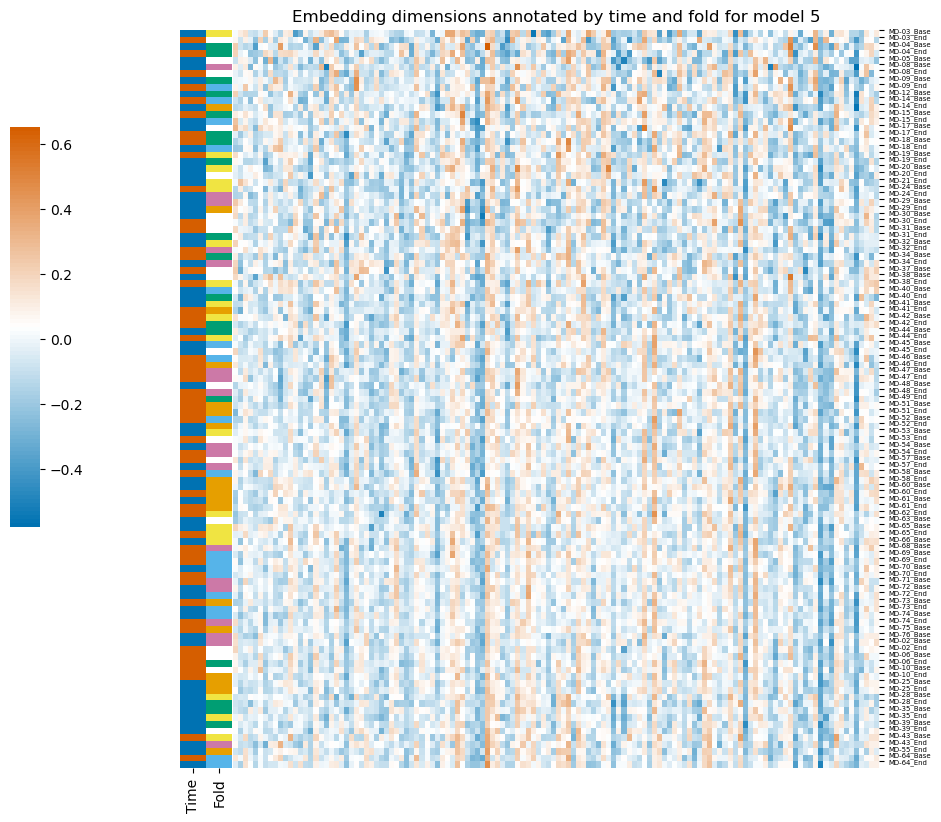

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

def plot_embedding(model_num, labels, embedding):
    annotations = get_model_annotations(model_num, labels)
    embedding = embedding.loc[annotations.index]
    cmap = LinearSegmentedColormap.from_list('custom_cmap', ['#0072B2', 'white', '#D55E00'], N=100) 
    
    time_colors = annotations['Time'].map({'Baseline': '#0072B2', 'Endpoint': '#D55E00'})  
    fold_colors = annotations['Fold'].map({
        1: '#009E73',  # Green
        2: '#F0E442',  # Yellow
        3: '#CC79A7',  # Pink
        4: '#56B4E9',  # Light blue
        5: '#E69F00'   # Orange
    })

    row_colors = pd.DataFrame({'Time': time_colors, 'Fold': fold_colors})

    g = sns.clustermap(embedding,
                       cmap=cmap, 
                       col_cluster=False,
                       row_colors=row_colors, 
                       xticklabels=False)  
    
 
    g.ax_heatmap.set_yticks(np.arange(embedding.shape[0]))
    g.ax_heatmap.set_yticklabels(embedding.index, fontsize=5)

    g.ax_row_dendrogram.set_visible(False)
    g.ax_col_dendrogram.set_visible(False)
    
    g.cax.set_position([0.02, 0.3, 0.03, 0.4])

    g.ax_heatmap.set_title(f'Embedding dimensions annotated by time and fold for model {model_num}')
    plt.show()
    g.savefig(f'../results/missingness/p_1.0_q_1.0_g_0_model_{model_num}_embedding_heatmap.png', dpi=300)
    
for model_num in range(1, 6):
    plot_embedding(model_num, labels, embedding)